## MNIST Recognization

### Structure of Neuron network:

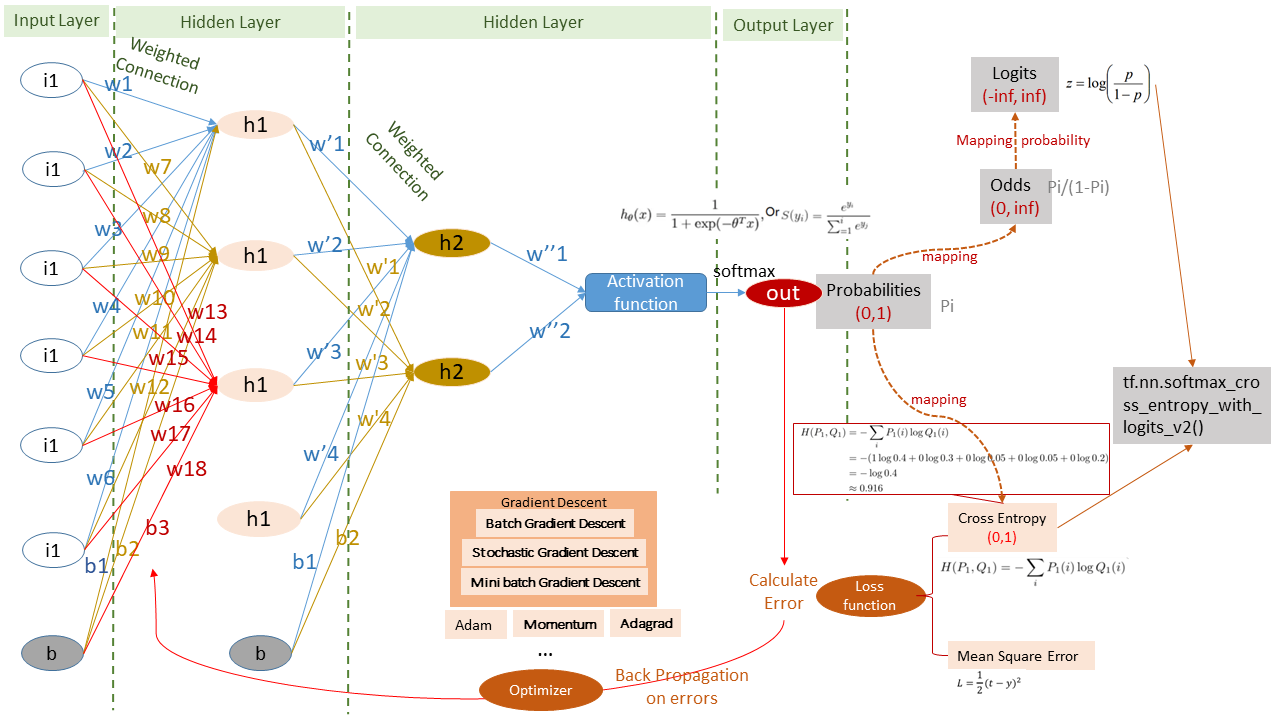

In [146]:
Image(filename='..\\..\\Image\\nn3.png')
# https://github.com/ziweifan177/Data_Science_Pilot/blob/master/%5BLearning%20and%20Exercise%5D%20Data%20Science/Data%20Science/Comparisons/ActivationFunctionsComparison.pptx

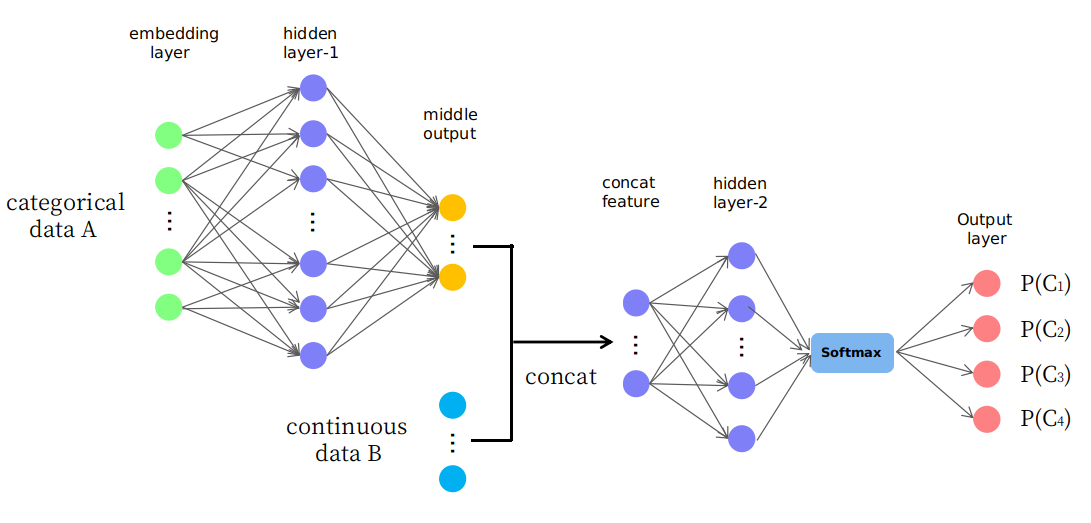

In [74]:
Image(filename='..\..\Image\structure.PNG')
# https://datascience.stackexchange.com/questions/29634/how-to-combine-categorical-and-continuous-input-features-for-neural-network-trai

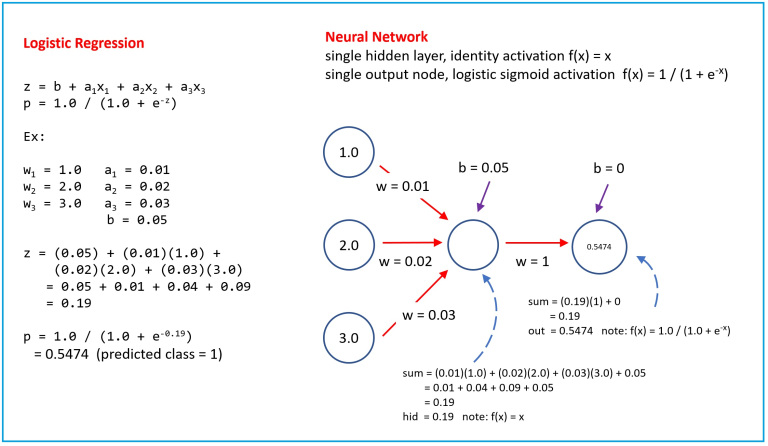

In [75]:
Image(filename='..\..\Image\structure2.jpg')
# https://jamesmccaffrey.wordpress.com/2017/07/01/a-neural-network-equivalent-to-logistic-regression/

In [76]:
import tensorflow as tf

In [77]:
from tensorflow.examples.tutorials.mnist import input_data

### Step 1: input data:

In [78]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [79]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [80]:
mnist.train.images.shape

(55000, 784)

In [81]:
sample = mnist.train.images[2].reshape(28,28)

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

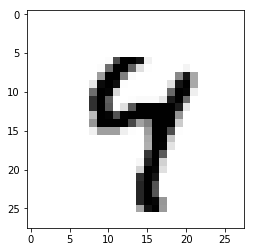

In [83]:
plt.imshow(sample, cmap='Greys')

### Step 2: Parameter settings:

- Input and output parameters:

In [84]:
n_samples = mnist.train.num_examples #55000
n_input = 784 # pixels

n_classes = 10 #Output classes

- Layers: Neuron parameters:

In [85]:
n_hidden_1 = 256 # Layer1: neuron numbers; Longer if more neurons and layers.
n_hidden_2 = 256 # Layer2: neuron numbers;

- Train:The top 3 important parameter:

In [86]:
batch_size = 100
training_epochs = 15
learning_rate = 0.001 #Longer is lower

### Step 3: Weights, bias Variable Definition:

- __Normal distribution(Gaussian):__   
    Incredible number of processes in nature and social sciences naturally follows the Gaussian distribution.

In [87]:
x = tf.placeholder('float', [None, n_input]) # x: Placeholder for data input;
y = tf.placeholder('float', [None, n_classes])

In [88]:
weights = {
            'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
            'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
            'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [89]:
biases = {
            'b1': tf.Variable(tf.random_normal([n_hidden_1])),
            'b2': tf.Variable(tf.random_normal([n_hidden_2])),
            'out': tf.Variable(tf.random_normal([n_classes]))
}

* __Loss Functions and Optimizers:__
    * a static representation of how your model is performing.
    * Most machine learning algorithms use some sort of loss function in the process of optimization, or finding the best parameters (weights) for your data.

#### * Loss function:  
it may be much worse to guess too high than to guess too low, and the loss function you select must reflect that.  
#### * Types of Loss function:
- 1. __Mean Squared Error (MSE):__
    -__Why:__ implement and generally works pretty well. 
    -__How:__ take the difference between your predictions and the ground truth, square it, and average it out across the whole dataset.
        

- This part is to define 2 dictionaries to store weights and bias.

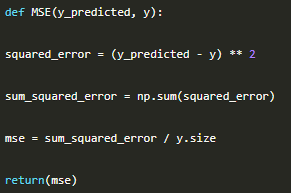

In [90]:
from IPython.display import Image
Image(filename='..\..\Image\mse.PNG')

- 2. __Likelihood Loss:__
    - commonly used in __classification problems__.
    - takes the predicted probability for each input example and multiplies them.
        - For example, consider a model that outputs probabilities of [0.4, 0.6, 0.9, 0.1] for the ground truth labels of [0, 1, 1, 0]. The likelihood loss would be computed as (0.6) * (0.6) * (0.9) * (0.9) = 0.2916.

- 3. __Log Loss (Cross Entropy Loss):__
    - frequently in classification problems:Can be a loss function to train a classification model.  
    - it penalizes heavily for being very confident and very wrong. 
    - A perfect model would have a log loss of 0.
    - Functions:
        - In __binary classification__, where the number of classes M equals 2, cross-entropy can be calculated as:  
    __−(ylog(p)+(1−y)log(1−p))__
        - In multiclass classification, we calculate a separate loss for each class label per observation and sum the result:   
    

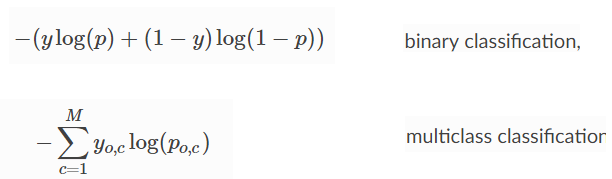

In [104]:
Image(filename='..\\..\\Image\\entro.PNG')

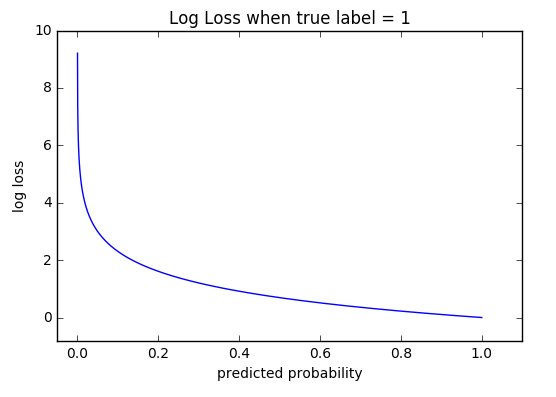

In [103]:
Image(filename='..\\..\\Image\\cross_entropy.PNG')
# The graph shows the range of possible loss values given a true observation (isDog = 1).
# https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html

- E.g.: __A dataset of animal images and there are five different animals. Each image has only one animal in it.__  
 Entropy of each image is all '0'!: In other words, one-hot encoded labels tell us what animal each image has with 100% certainty. It is not like the first image can be a dog for 90% and a cat for 10%. It is always a dog, and there will be no surprise.

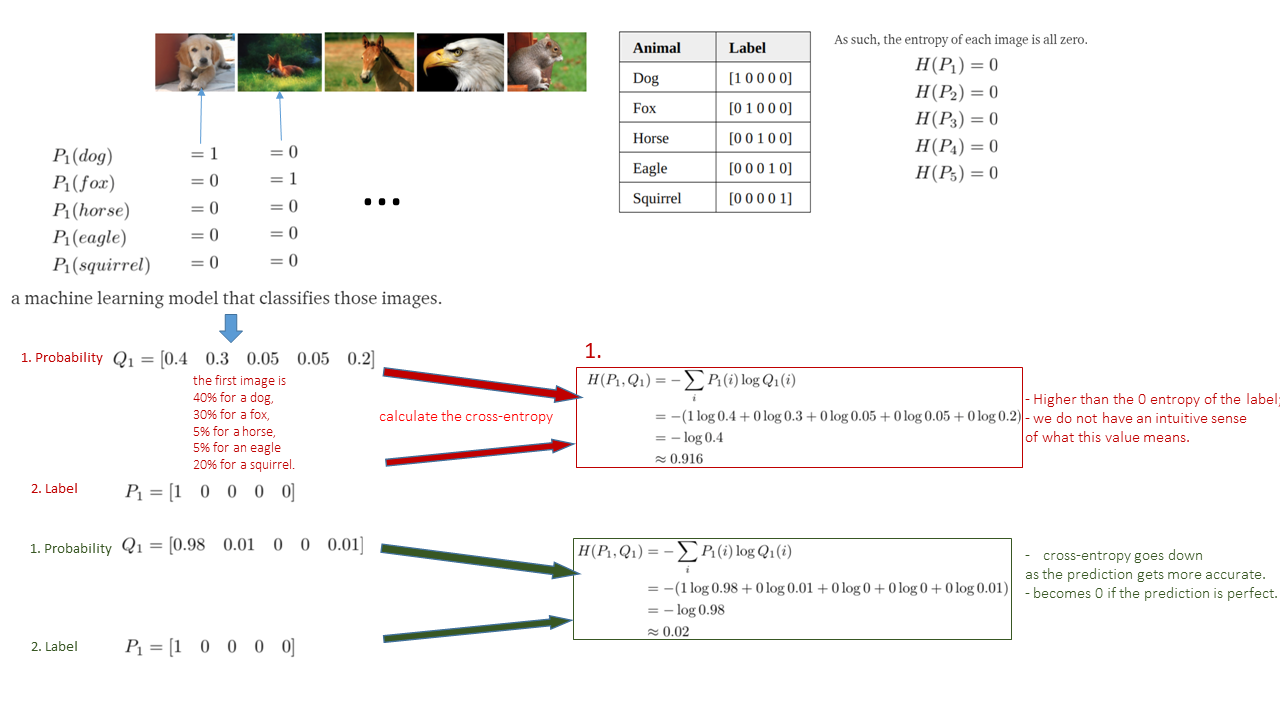

In [128]:
Image(filename='..\\..\\Image\\CrossEntropy.png')
# https://github.com/ziweifan177/Data_Science_Pilot/blob/master/%5BLearning%20and%20Exercise%5D%20Data%20Science/Data%20Science/Comparisons/CrossEntropy.pptx

#### From the eg.:
- The Q1 estimation is not very precise or confident about what animal the first image has.
In contrast, the P1 label gives us the exact distribution of the first image’s animal class. It tells us it is a dog with 100% certainty.

### Step 4: Define to creat model:

- __Activation function:__  
    * To check the Y value produced by a neuron and decide whether outside connections should consider this neuron as “fired” or not. Or rather let’s say — “activated” or not.

- __Activation Functions:__
    - 1. __Linear function:__
        - __"A = cx":__  it gives a range of activations, so it is not binary activation. That means these two layers ( or N layers ) can be replaced by a single layer. Ah! We just lost the ability of stacking layers this way...  
        
    - 2. __Sigmoid Function (Logistic Activation Function):__
        -  nonlinear, so we can stack layers.
        - X values -2 to 2, Y values are very steep. Which means, any small changes in the values of X in that region will cause values of Y to change significantly.
        - Making clear distinctions on prediction.
        - output of the activation function is always going to be in range (0,1).(it won’t blow up the activations then.)
        - the activation is dense. This is costly. 

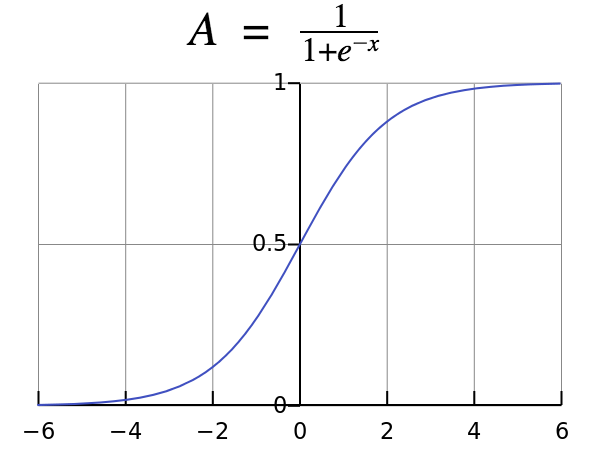

In [91]:
from IPython.display import Image
Image(filename='..\..\Image\sig.PNG')

- __3. Tanh Function:__  
    - a scaled sigmoid function! but the gradient is stronger for tanh than sigmoid.
    - nonlinear, so great we can stack layers!
    - sigmoid or tanh? will depend on your requirement of gradient strength. 
    - Mainly used __classification__ between __2 classes__.
    - tanh & sigmoid functions are used in feed-forward nets.
    - the activation is dense. This is costly. 

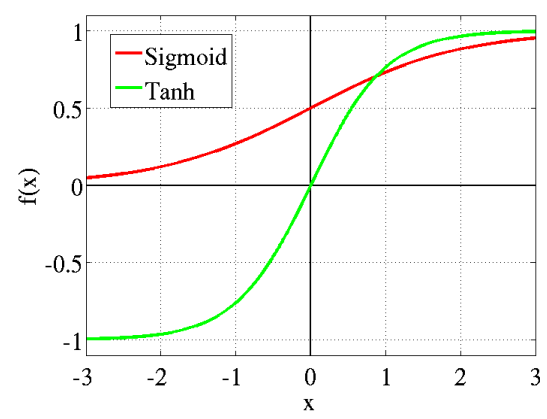

In [92]:
Image(filename='..\\..\\Image\\tan.png')

- __4. ReLU (Rectified Linear Unit) Activation Function:__
    - The most used activation function in the world right now. Used in almost all the convolutional neural networks or deep learning.
    - __Range: 0 to infinity  
    - __monotonic__
    - Any negative input given to the ReLU activation function turns the value into zero immediately in the graph, which in turns affects the resulting graph by not mapping the negative values appropriately.
    - ReLu is nonlinear in nature. And combinations of ReLu are also non linear! so this means we can stack layers. 
    - __less computationally expensive__ than tanh and sigmoid

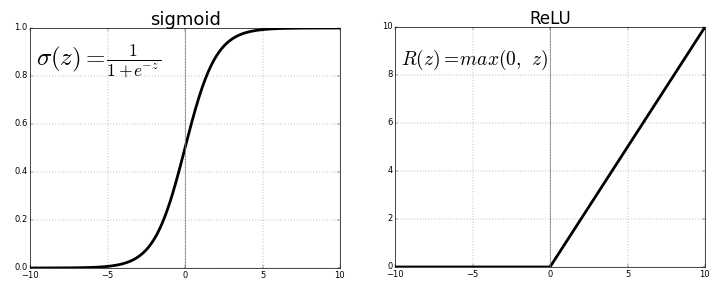

In [93]:
Image(filename='..\\..\\Image\\relu.png')

### Pick which activation function?
- When you know the function you are trying to approximate has certain characteristics, you can choose an activation function which will approximate the function faster leading to faster training process.   
E.g.: a sigmoid works well for a classifier; (because approximating a classifier function as combinations of sigmoid is easier than maybe ReLu.)

### Which will lead to faster training process and convergence?
- You can use your own custom functions too!
- If you don’t know the nature of the function you are trying to learn, then maybe i would suggest start with ReLu, and then work backwards. ReLu works most of the time as a general approximator!

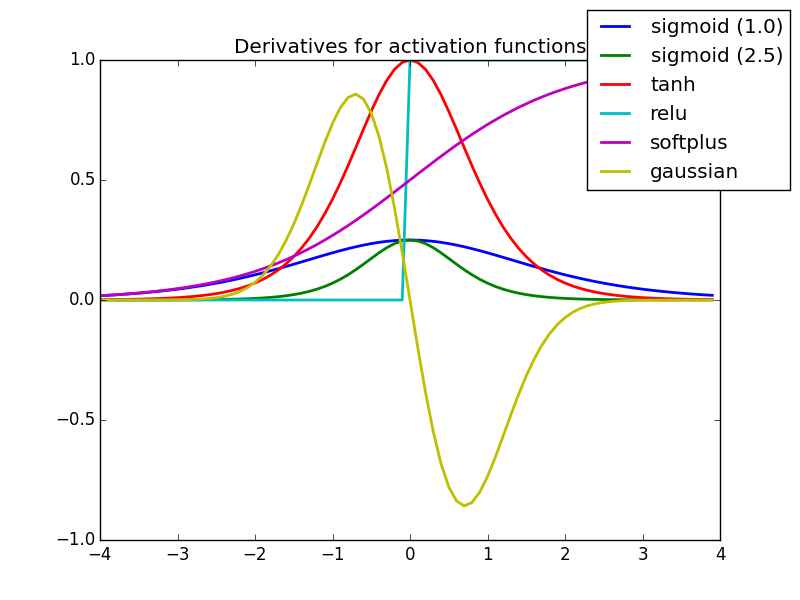

In [94]:
### 6. Comparison of all activation functions:
Image(filename='..\\..\\Image\\activation.png')

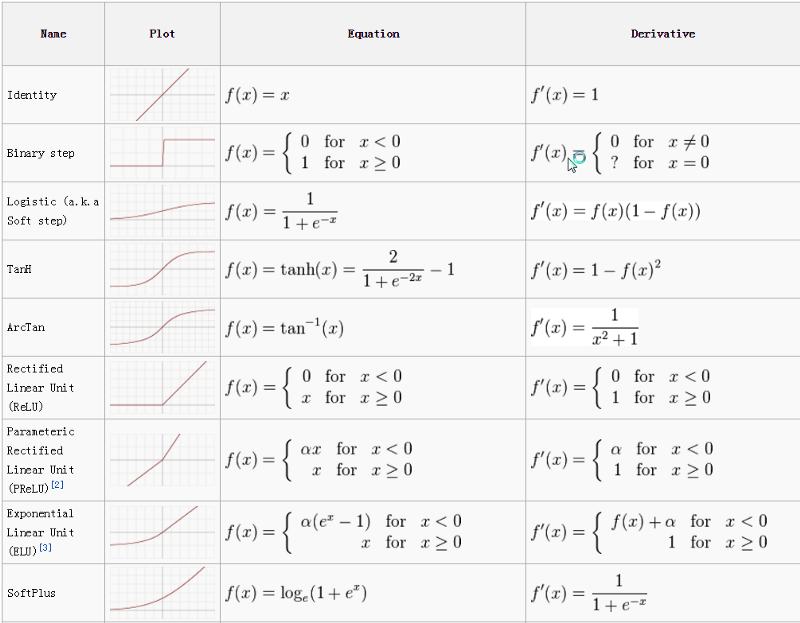

In [95]:
Image(filename='..\\..\\Image\\activation2.png')

- __For comparing the different activation functions:__
    https://github.com/ziweifan177/Data_Science_Pilot/blob/master/%5BLearning%20and%20Exercise%5D%20Data%20Science/Data%20Science/Comparisons/ActivationFunctionsComparison.pptx

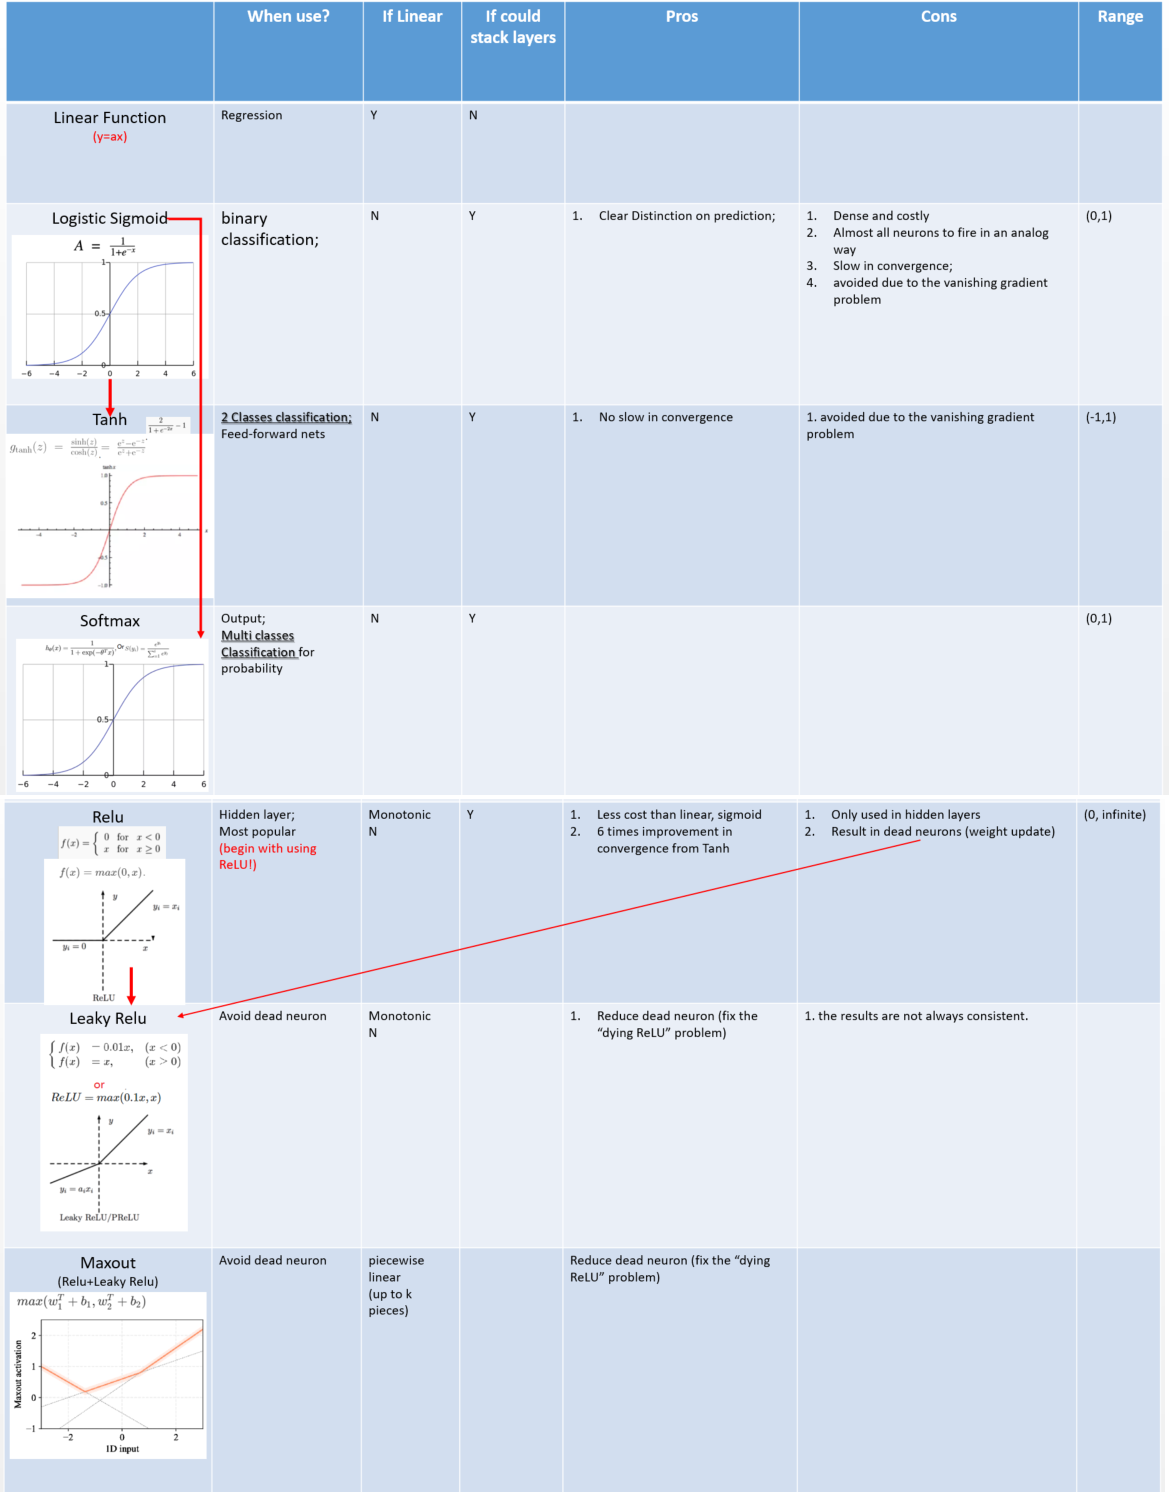

In [96]:
Image(filename='..\\..\\Image\\comparison.png')

- __Note:__  
    Using a sigmoid or tanh will cause almost all neurons to fire in an analog way. That means almost all activations will be processed to describe the output of a network. In other words the activation is dense. This is costly. We would ideally want a few neurons in the network to not activate and thereby making the activations sparse and efficient.  
    ReLu give us this benefit. Imagine a network with random initialized weights ( or normalised ) and almost 50% of the network yields 0 activation because of the characteristic of ReLu ( output 0 for negative values of x ). This means a fewer neurons are firing ( sparse activation ) and the network is lighter. 
    

In [99]:
def multiplayer_perceptron(x, weights, biases):
    '''
    x: Placeholder for data input;
    weights: dictionary of weights
    biases: dictionary of biases values
    '''
    # X*W+B:
    layer1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # 1st hidden layers: Relu
    layer1 = tf.nn.relu(layer1)

    # 2nd hidden layers
    layer2 = tf.add(tf.matmul(layer1, weights['h2']), biases['b2'])
    layer2 = tf.nn.relu(layer2)
    
    # Last hidden layers
    outLayer = tf.matmul(layer2, weights['out'])+biases['out']
    
    return outLayer

### Step 5: Define output layer, loss function and optimizer:

- 1. logits:
    - If __p is a probability__, then __p/(1 − p)__ is the corresponding __odds__; 
    - the logit of the probability is the __logarithm of the odds__, i.e.:

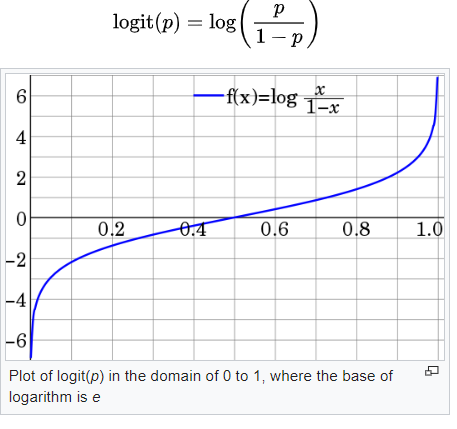

In [130]:
Image(filename='..\\..\\Image\\logit.png')

- Relatioship between Logits & Probability:
    - __Logit of 0__: A probability of 0.5.
    - __Negative logit values__: probabilities < 0.5
    - __Positive logits__: probabilities > 0.5

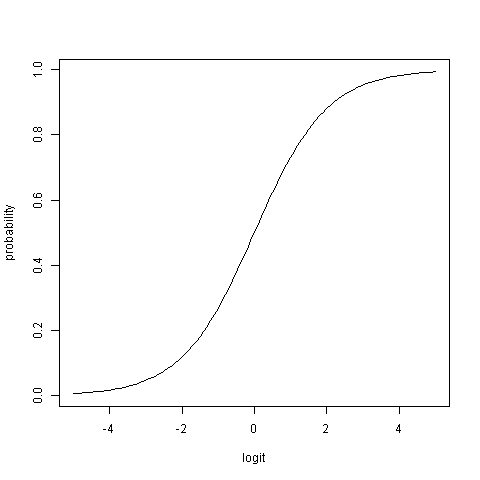

In [132]:
Image(filename='..\\..\\Image\\logits2.png')

#### - Probability VS. Odds:
https://towardsdatascience.com/are-you-mixing-up-odds-with-probability-5f2d385fa890

- The probability of something happening is always less than the odds of it happening (assuming the probability is non-zero).
- The smaller the probability, the more similar probability and odds will be. For example, the probability of winning the UK National Lottery is 0.0000000221938762. The odds are 0.0000000221938767.
- The larger the probability, the larger the difference with the odds. High probabilities have astronomical odds. A probability of 90% equates to odds of 900%.
- WHY Odds?  
    - One area where this can cause substantial errors in understanding is when logistic regression is used in studying a problem. Logistic regression is used to model how certain input variables might influence a binary outcome. (Logistic regression models use odds ratios to quantify the degree of influence of a given input variable. )
    - e.g.: A logistic regression might be used to determine how a number of lifestyle factors influenced a five year survival outcome for a disease. 

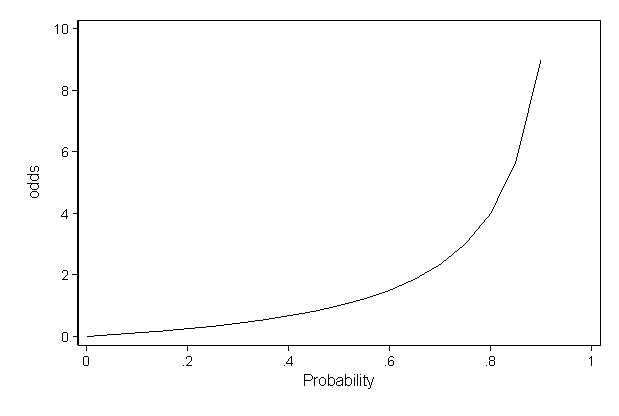

In [133]:
Image(filename='..\\..\\Image\\odds.gif')

#### - 2. With Loss function and optimizer:

- __Optimizer:__   
    Training network is iterative process where we want to minimize Loss function. and the appropriate method that we use for this is Gradient Descent. (With η — is a learning rate.)
    Or: Optimizers tie together the loss function and model parameters by updating the model in response to the output of the loss function.  
- __Gradients:__  
    "what a small change in a weight or parameter would do to lower the output of the loss function and thereby make our model more accurate. "
    "connect the loss function and the weights"
    
- __Elements of Gradient Descent:__
    - __Learning Rate:__ multiply the gradients by to scale them; Ensures that any changes we make to our weights are pretty small.
    - __Regularization:__ Overfitting can happen if one parameter is weighed too heavily and ends up dominating the formula. Regularization is a term added into the optimization process that helps avoid this.(BUT, it means in addition for being penalized for incorrect predictions, you’ll also be penalized for having large weight values even if your predictions are correct.)
    
- __Types of Optimizers:__  
    - 1. __classical stochastic gradient descent:__  
        - either uses batches of examples at a time or random examples on each pass.
        - More efficiently.
        - Need to find the best learning rate η
        - BUT, maintains a single learning rate (termed alpha) for all weight updates and the learning rate does not change during training. (inefficient and expensive)  
        
    - 2. __Adaptive Stochastic Gradient Descent Methods:__
        
    - 3. __Adam:__  
        - An optimization algorithm that can used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.
        - computes individual adaptive learning rates for different parameters from estimates of first and second moments of the gradients. (using past gradients to calculate current gradients.)
        - effective step size depends on learning rate.
        - BUT: Learning rate is handcrafted.
        - WHERE? Very good for deep CNNs. 
    - 4. __Adagrad (Adaptive Gradient):__ adapts learning rate for each parameter separately.
    - ...
- https://medium.com/datadriveninvestor/overview-of-different-optimizers-for-neural-networks-e0ed119440c3

In [118]:
# Get output layer:
pred = multiplayer_perceptron(x, weights, biases)
pred

<tf.Tensor 'add_47:0' shape=(?, 10) dtype=float32>

- __tf.nn.softmax_cross_entropy_with_logits_v2()__: Computes softmax cross entropy between logits and labels. 

In [115]:
# Check the loss and optimize:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(pred,y))

<tf.Tensor 'Mean_2:0' shape=() dtype=float32>

In [117]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

<tf.Operation 'Adam_3' type=NoOp>

### Step 6: Train the model:

In [143]:
t = mnist.train.next_batch(10)
# batch of 10 samples.
t

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]]))

In [142]:
#type(t)

tuple

In [140]:
len(t)

2

In [141]:
len(t[0]) #len(t[1]) is same.

10